
We can use the following libraries.

In [1]:
import matplotlib.pyplot as plt
import math
import sys
import random
print(sys.version)

3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 12:30:02) [MSC v.1900 64 bit (AMD64)]


## Exercise 1: Preliminary work

### Question 1

Download the graph http://lioneltabourier.fr/documents/as_caida.txt and load it in memory as a dictionary of lists (as usual). 

This graph is a partial map of the Internet at the AS level as obtained using BGP tables during the CAIDA project in 2007. It will be used during the rest of this practical work as a reference for comparison. 

Count its number of nodes and links. Plot its degree distribution. Of course, you can use the codes seen in previous practical works.


In [2]:
def load_graph(file):
    f = open(file, 'r')
    contenu=f.read() 
    Liste=contenu.split( )
    d={}
    for l in Liste:
        d[l]=[]
    j=0   
    for j in range(len(Liste)-1):
             for k in d.keys():
                   if k==Liste[j]:
                        if j%2==0:
                            d[k].append(Liste[j+1])
                        if j%2!=0:
                            d[k].append(Liste[j-1])
    f.close()
    return(d)


In [4]:
#Nombre de noeud et de liens:
def number_nodes_links(graph):
    f = open(graph, 'r')                    
    NombreDeLiens=len(f.readlines())
    G=load_graph(graph)
    NombreDeNoeuds=0
    l=len(G)
    print("nombre de noeuds =", l)
    print("nombre de liens=", NombreDeLiens)
number_nodes_links("as_caida.txt")

nombre de noeuds = 26475
nombre de liens= 53381


In [3]:
def Degree_distribution(graph):
    G=load_graph(graph)
    List=[]
    dict={}
    for i in G:
        List.append(len(G[i]))
    for j in List:
        dgr=0
        for k in List:
            if k==j:
                dgr+=1
                dict[j]=dgr
    return dict
G=Degree_distribution("as_caida.txt")


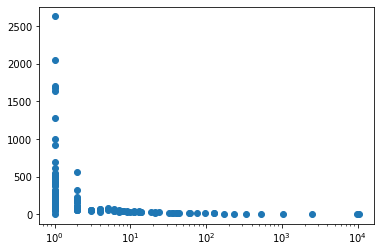

In [7]:
lists=sorted(G.items()) 
x,y=zip(*lists) 
#plt.plot(y,x)
plt.scatter(y,x)
plt.xscale("log")
plt.show()

## Exercise 2: Erdös-Rényi model

### Question 2

Create an Erdös-Rényi graph with the same number of nodes and links as the original graph.

In [5]:
def Erdös_Rényi(n,m):
    dict={}
    for i in range(n):
        dict[i]=[]
    while m!=0:
        u=random.randint(0,n-1)
        v=random.randint(0,n-1)
        if v not in dict[u] and u not in dict[v]:
            dict[u].append(v)
            dict[v].append(u)
            m-=1
            
    return dict
ER=Erdös_Rényi(26475,53381)


In [9]:
#degree de distribution du graphe_Moedel Erdos Renyi
def Degree_distribution2(G):
    List=[]
    dict={}
    for i in G:
        List.append(len(G[i]))
    for j in List:
        dgr=0
        for k in List:
            if k==j:
                dgr+=1
                dict[j]=dgr
    return dict
G2=Degree_distribution2(ER)

### Question 3

Compare its degree distribution and number of triangles to the one of the original graph.

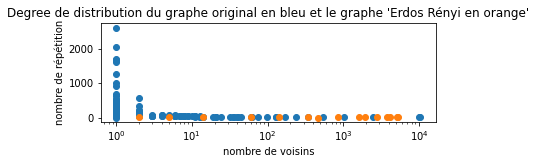

In [10]:
#comparison du dgree de distribution
lists=sorted(G.items())
lists2=sorted(G2.items())
x,y=zip(*lists)
a,b=zip(*lists2)
plt.subplot(211)
plt.scatter(y,x)
plt.scatter(b,a)
plt.xscale("log")
plt.xlabel("nombre de voisins")
plt.ylabel("nombre de répétition")
plt.title("Degree de distribution du graphe original en bleu et le graphe 'Erdos Rényi en orange'")
plt.show()

In [11]:
#Comparaison des degrés de distribution en comptant la fraction nModel/n
nModel=0
original=load_graph("inet.txt")
for k in original:
    try:
        if len(ER[k])!=len(original[k]):
             nModel+=1
    except: pass
        
print("le rapport entre les noeuds qui ont un degree différent:", nModel/len(original))
   

le rapport entre les noeuds qui ont un degree différent: 0.0


On remarque que tous les degrés sont différents

In [16]:
#compariason du nombre de traingles
def adjList_to_adjMatrix(graph): #transformtion d'une liste adjacente à une matrice adjacente pour faciliter le calcul des triangles
    keys=sorted(graph.keys())
    size=len(keys)
    M = [ [0]*size for i in range(size) ]
    for a,b in [(keys.index(a), keys.index(b)) for a, row in graph.items() for b in row]:
           M[a][b] = 2 if (a==b) else 1
    return M
M1=adjList_to_adjMatrix(load_graph("as_caida.txt"))

In [ ]:
#temps d'éxecution trop important
def countTriangle(adjMatrix): 
    nodes = len(adjMatrix) 
    count_Triangle = 0  
    for i in range(nodes): 
        for j in range(nodes): 
            for k in range(nodes): 
                if( i!=j and i !=k and j !=k and 
                        adjMatrix[i][j] and adjMatrix[j][k] and adjMatrix[k][i]): 
                    count_Triangle += 1
    return int (count_Triangle/6)
print("le nombre de triangles dans le graph original est :", countTriangle(M1))

le nombre de triangles dans le graph original est : 36365

In [20]:
M2=adjList_to_adjMatrix(ER)

In [ ]:
print("le nombre de triangles dans le graph ER est :", countTriangle(M2))

le nombre de triangles dans le graph ER est : 11

## Exercise 2: Barabasi-Albert model


### Question 4

Create a Barabasi-Albert graph with a number of links and nodes comparable to the original graph. We remind that in a BA model with $n$ nodes, the number of links $m$ is roughly equal to $\alpha n$ where $ \alpha $ is the parameter of the model. 

In [23]:
def degree_node(graph,node):
    d = 0
    for i in range(node):
        d += len(graph[i])
    return d

In [24]:
def Barabasi_Albert(n,m):
    dict={}
    for i in range(4):
        dict[i]=[]
    for j in range(3):
        dict[j].append(j+1) #commencer par un graphe  complètement connecté
        dict[j+1].append(j)
    
    for k in range(4,n):
        dict[k]=[]      #initialiser la taille du dictionnaire tel que l'original
        alpha=m/n #indice du modèle Barabasi-Albert
        num=0
        while num < alpha:
            u = random.randint(0,k-1)
            d = degree_node(dict,k-1)
            num = len(dict[u])
            p = num/d 
            rand = random.random()
            if rand >= p:
                if u not in dict[k] and k not in dict[u]:
                    dict[k].append(u)
                    dict[u].append(k)
                    num+=1
    return dict
BA=Barabasi_Albert(26475,53381)


### Question 5

Compare its degree distribution and number of triangles to the one of the original graph.

In [24]:
G3=Degree_distribution2(BA)

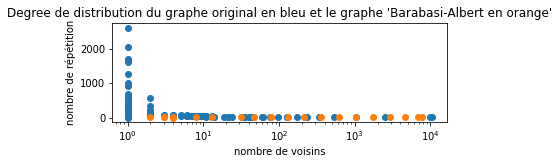

In [25]:
#comparison du dgree de distribution
lists=sorted(G.items())
lists2=sorted(G3.items())
x,y=zip(*lists)
a,b=zip(*lists2)
plt.subplot(211)
plt.scatter(y,x)
plt.scatter(b,a)
plt.xscale("log")
plt.xlabel("nombre de voisins")
plt.ylabel("nombre de répétition")
plt.title("Degree de distribution du graphe original en bleu et le graphe 'Barabasi-Albert en orange'")
plt.show()

In [42]:
#Comparaison des degrés de distribution en comptant la fraction nModel/n
nModel=0
original1=load_graph("inet.txt")
for j in original1:
    try:
        if len(BA[j])!=len((original1[j])):
            nModel+=1
    except: pass
print("le rapport entre les noeuds qui ont un degré \ndifférent et les neouds qui ont gardé le même degré:", nModel/len(original1))
   

le rapport entre les noeuds qui ont un degré 
différent et les neouds qui ont gardé le même degré: 0.0


In [ ]:
M3=adjList_to_adjMatrix(BA)
print("le nombre de triangles du graphe Barabasi Albert est :", countTriangle(M3))

le nombre de triangles du graphe Barabasi Albert est : 144

## Exercise 3: Watts-Strogatz model

### Question 6

Create a regular graph with a number of nodes $n$ equals to the one of the initial CAIDA graph. We have these constraints:

* all nodes of a regular graph have the same degree $k$, choose $k$ so that the number $m$ of edges is close to the one of the CAIDA graph,

* each node is connected to the nodes with the closest index, for example, if $k=6$, node $i$ will be connected to nodes $ i-1 $, $ i-2 $, $ i-3$ and $ i+1 $, $ i+2 $, $ i+3 $.  

In [26]:
def Regular_graph(n,k):
    dic={}
    for i in range(n):
        dic[i]=[]
        for j in range(i-int(k/2),i+int(k/2)+1):
            if j>=0 and j<n:
                dic[i].append(j)
            else:
                dic[i].append(abs(j%n))
        dic[i].remove(i)

    print(dic)
#Regular_graph(26475,2)
Regular_graph(14,6)

{0: [11, 12, 13, 1, 2, 3], 1: [12, 13, 0, 2, 3, 4], 2: [13, 0, 1, 3, 4, 5], 3: [0, 1, 2, 4, 5, 6], 4: [1, 2, 3, 5, 6, 7], 5: [2, 3, 4, 6, 7, 8], 6: [3, 4, 5, 7, 8, 9], 7: [4, 5, 6, 8, 9, 10], 8: [5, 6, 7, 9, 10, 11], 9: [6, 7, 8, 10, 11, 12], 10: [7, 8, 9, 11, 12, 13], 11: [8, 9, 10, 12, 13, 0], 12: [9, 10, 11, 13, 0, 1], 13: [10, 11, 12, 0, 1, 2]}


### Question 7

Starting from the graph created in the previous question, generate Watts-Strogatz models with several values of the parameter $p$. Compare the degree distribution and number of triangles to the one of the original graph for a few typical values of $k$, say 0.01, 0.1, 0.3.

### Bonus question

Compute the diameter of the regular graph and of the different Watts-Strogatz models that you have made in the previous question and compare the result to what is expected from the course.